# Employment by sector and departement

## Dependencies

In [2]:
from shapely import wkt

import pandas as pd
from pandas.api.types import CategoricalDtype
import geopandas as gpd
import seaborn as sns
import math

from matplotlib.pyplot import pie
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pynsee.metadata as pm
import pynsee.geodata as pg
import pynsee.localdata as pl

## Retrieving datasets

In [3]:
# get a list all data available : datasets and variables
metadata = pl.get_local_metadata()

# geographic metadata
nivgeo = pl.get_nivgeo_list()

!!! This function renders only package's internal data,
it might not be the most up-to-date
Have a look at api.insee.fr !!!

!!! This function renders only package's internal data,
it might not be the most up-to-date
Have a look at api.insee.fr !!!

We would like to retrieve administrative border and make some
pre-defined processing to ease mapping later

In [4]:
# get departement map
dep = pg.get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:departement')
dep = dep.translate(departement=['971', '972', '974', '973', '976'],
                   factor=[1.5, 1.5, 1.5, 0.3, 1.5])

dep = dep.zoom(factor = 3.5 , startAngle = math.pi * (1 - 3 * 1/9))

dep = dep.loc[:, ["insee_dep", "geometry"]]
dep = dep.rename(columns={'insee_dep': 'CODEGEO'})

Previously saved data used
/home/coder/.cache/pynsee/pynsee/399f6d97ce4631c4e02c487406744440
Set update=True to get the most up-to-date data

We end up with the following shapefile:

<AxesSubplot:>

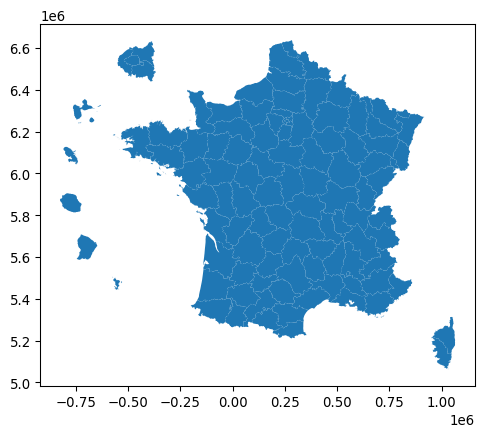

In [5]:
gpd.GeoDataFrame(dep).plot()

## Retrieving “departement” data from INSEE’s API

We first get local data from INSEE API:

In [6]:
data = pl.get_local_data(dataset_version = 'GEO2020FLORES2017',
                     variables =  'NA17',
                     nivgeo = 'DEP')
data = data.rename(columns={'NA17': 'A17'})

Getting regions:   0%|          | 0/18 [00:00<?, ?it/s]

Getting regions: 100%|██████████| 18/18 [00:00<00:00, 1959.70it/s]

Getting departements:   0%|          | 0/18 [00:00<?, ?it/s]

Getting departements:   6%|▌         | 1/18 [00:00<00:06,  2.51it/s]

Getting departements:  11%|█         | 2/18 [00:00<00:05,  3.20it/s]

Getting departements:  17%|█▋        | 3/18 [00:00<00:03,  3.86it/s]

Getting departements:  22%|██▏       | 4/18 [00:01<00:03,  4.38it/s]

Getting departements:  28%|██▊       | 5/18 [00:01<00:02,  4.88it/s]

Getting departements:  33%|███▎      | 6/18 [00:01<00:04,  2.54it/s]

Getting departements:  39%|███▉      | 7/18 [00:03<00:09,  1.19it/s]

Getting departements:  44%|████▍     | 8/18 [00:05<00:11,  1.16s/it]

Getting departements:  50%|█████     | 9/18 [00:07<00:12,  1.40s/it]

Getting departements:  56%|█████▌    | 10/18 [00:10<00:15,  1.92s/it]

Getting departements:  61%|██████    | 11/18 [00:15<00:18,  2.71s/it]

Getting departements:  67%|██████▋   | 12/18 [00:16<00:14,  2.39s/it]

Getting departements:  72%|███████▏  | 13/18 [00:18<00:10,  2.07s/it]

Getting departements:  78%|███████▊  | 14/18 [00:22<00:10,  2.70s/it]

Getting departements:  83%|████████▎ | 15/18 [00:26<00:09,  3.03s/it]

Getting departements:  89%|████████▉ | 16/18 [00:28<00:05,  2.95s/it]

Getting departements:  94%|█████████▍| 17/18 [00:29<00:02,  2.25s/it]

Getting departements: 100%|██████████| 18/18 [00:29<00:00,  1.66s/it]

Getting departements: 100%|██████████| 18/18 [00:29<00:00,  1.65s/it]

By default, the query is on all departements

Getting data:   0%|          | 0/102 [00:00<?, ?it/s]

Getting data:   1%|          | 1/102 [00:00<00:17,  5.71it/s]

Getting data:   2%|▏         | 2/102 [00:00<00:17,  5.69it/s]

Getting data:   3%|▎         | 3/102 [00:00<00:16,  5.99it/s]

Getting data:   4%|▍         | 4/102 [00:00<00:16,  6.08it/s]

Getting data:   5%|▍         | 5/102 [00:00<00:15,  6.38it/s]

Getting data:   6%|▌         | 6/102 [00:00<00:15,  6.11it/s]

Getting data:   7%|▋         | 7/102 [00:01<00:15,  6.11it/s]

Getting data:   8%|▊         | 8/102 [00:01<00:15,  6.03it/s]

Getting data:   9%|▉         | 9/102 [00:01<00:15,  5.99it/s]

Getting data:  10%|▉         | 10/102 [00:01<00:15,  5.80it/s]


API query number limit reached - function might be slowed down

Getting data:  11%|█         | 11/102 [00:31<14:11,  9.36s/it]

Getting data:  12%|█▏        | 12/102 [00:31<09:49,  6.55s/it]

Getting data:  13%|█▎        | 13/102 [00:32<06:50,  4.61s/it]

Getting data:  14%|█▎        | 14/102 [00:32<04:46,  3.25s/it]

Getting data:  15%|█▍        | 15/102 [00:32<03:21,  2.31s/it]

Getting data:  16%|█▌        | 16/102 [00:32<02:22,  1.65s/it]

Getting data:  17%|█▋        | 17/102 [00:32<01:41,  1.20s/it]

Getting data:  18%|█▊        | 18/102 [00:32<01:13,  1.14it/s]

Getting data:  19%|█▊        | 19/102 [00:35<02:09,  1.56s/it]

Getting data:  20%|█▉        | 20/102 [00:36<01:32,  1.13s/it]

Getting data:  21%|██        | 21/102 [00:39<02:20,  1.74s/it]

Getting data:  22%|██▏       | 22/102 [00:42<02:52,  2.16s/it]

Getting data:  23%|██▎       | 23/102 [00:47<04:01,  3.06s/it]

Getting data:  24%|██▎       | 24/102 [00:47<02:50,  2.18s/it]

Getting data:  25%|██▍       | 25/102 [00:49<02:47,  2.17s/it]

Getting data:  25%|██▌       | 26/102 [00:53<03:30,  2.77s/it]

Getting data:  26%|██▋       | 27/102 [00:58<03:58,  3.18s/it]

Getting data:  27%|██▋       | 28/102 [01:00<03:32,  2.87s/it]

Getting data:  28%|██▊       | 29/102 [01:00<02:29,  2.05s/it]

Getting data:  29%|██▉       | 30/102 [01:00<01:46,  1.48s/it]

Getting data:  30%|███       | 31/102 [01:00<01:16,  1.07s/it]

Getting data:  31%|███▏      | 32/102 [01:00<00:55,  1.27it/s]

Getting data:  32%|███▏      | 33/102 [01:00<00:41,  1.68it/s]

Getting data:  33%|███▎      | 34/102 [01:01<00:31,  2.18it/s]

Getting data:  34%|███▍      | 35/102 [01:01<00:24,  2.76it/s]

Getting data:  35%|███▌      | 36/102 [01:01<00:19,  3.42it/s]

Getting data:  36%|███▋      | 37/102 [01:01<00:15,  4.08it/s]

Getting data:  37%|███▋      | 38/102 [01:01<00:13,  4.69it/s]

Getting data:  38%|███▊      | 39/102 [01:01<00:11,  5.39it/s]

Getting data:  39%|███▉      | 40/102 [01:01<00:10,  5.74it/s]

Getting data:  40%|████      | 41/102 [01:33<09:38,  9.48s/it]

Getting data:  41%|████      | 42/102 [01:33<06:40,  6.67s/it]

Getting data:  42%|████▏     | 43/102 [01:33<04:37,  4.71s/it]

Getting data:  43%|████▎     | 44/102 [01:33<03:13,  3.34s/it]

Getting data:  44%|████▍     | 45/102 [01:33<02:15,  2.38s/it]

Getting data:  45%|████▌     | 46/102 [01:33<01:35,  1.70s/it]

Getting data:  46%|████▌     | 47/102 [01:33<01:07,  1.23s/it]

Getting data:  47%|████▋     | 48/102 [01:33<00:48,  1.11it/s]

Getting data:  48%|████▊     | 49/102 [01:37<01:23,  1.58s/it]

Getting data:  49%|████▉     | 50/102 [01:37<00:59,  1.14s/it]

Getting data:  50%|█████     | 51/102 [01:40<01:29,  1.75s/it]

Getting data:  51%|█████     | 52/102 [01:43<01:48,  2.17s/it]

Getting data:  52%|█████▏    | 53/102 [01:48<02:30,  3.06s/it]

Getting data:  53%|█████▎    | 54/102 [01:48<01:44,  2.19s/it]

Getting data:  54%|█████▍    | 55/102 [01:51<01:42,  2.18s/it]

Getting data:  55%|█████▍    | 56/102 [01:55<02:07,  2.77s/it]

Getting data:  56%|█████▌    | 57/102 [01:59<02:23,  3.18s/it]

Getting data:  57%|█████▋    | 58/102 [02:01<02:06,  2.87s/it]

Getting data:  58%|█████▊    | 59/102 [02:01<01:28,  2.05s/it]

Getting data:  59%|█████▉    | 60/102 [02:01<01:03,  1.50s/it]

Getting data:  60%|█████▉    | 61/102 [02:01<00:44,  1.10s/it]

Getting data:  61%|██████    | 62/102 [02:02<00:32,  1.23it/s]

Getting data:  62%|██████▏   | 63/102 [02:02<00:23,  1.64it/s]

Getting data:  63%|██████▎   | 64/102 [02:02<00:17,  2.13it/s]

Getting data:  64%|██████▎   | 65/102 [02:02<00:13,  2.70it/s]

Getting data:  65%|██████▍   | 66/102 [02:02<00:11,  3.25it/s]

Getting data:  66%|██████▌   | 67/102 [02:02<00:09,  3.80it/s]

Getting data:  67%|██████▋   | 68/102 [02:02<00:07,  4.40it/s]

Getting data:  68%|██████▊   | 69/102 [02:03<00:06,  4.76it/s]

Getting data:  69%|██████▊   | 70/102 [02:03<00:06,  5.04it/s]

Getting data:  70%|██████▉   | 71/102 [02:34<04:54,  9.49s/it]

Getting data:  71%|███████   | 72/102 [02:34<03:20,  6.69s/it]

Getting data:  72%|███████▏  | 73/102 [02:34<02:16,  4.72s/it]

Getting data:  73%|███████▎  | 74/102 [02:34<01:33,  3.35s/it]

Getting data:  74%|███████▎  | 75/102 [02:35<01:04,  2.38s/it]

Getting data:  75%|███████▍  | 76/102 [02:35<00:44,  1.71s/it]

Getting data:  75%|███████▌  | 77/102 [02:35<00:30,  1.24s/it]

Getting data:  76%|███████▋  | 78/102 [02:35<00:21,  1.10it/s]

Getting data:  77%|███████▋  | 79/102 [02:38<00:36,  1.58s/it]

Getting data:  78%|███████▊  | 80/102 [02:38<00:25,  1.15s/it]

Getting data:  79%|███████▉  | 81/102 [02:41<00:36,  1.75s/it]

Getting data:  80%|████████  | 82/102 [02:45<00:43,  2.17s/it]

Getting data:  81%|████████▏ | 83/102 [02:50<00:58,  3.06s/it]

Getting data:  82%|████████▏ | 84/102 [02:50<00:39,  2.19s/it]

Getting data:  83%|████████▎ | 85/102 [02:52<00:37,  2.18s/it]

Getting data:  84%|████████▍ | 86/102 [02:56<00:44,  2.78s/it]

Getting data:  85%|████████▌ | 87/102 [03:00<00:47,  3.20s/it]

Getting data:  86%|████████▋ | 88/102 [03:03<00:40,  2.88s/it]

Getting data:  87%|████████▋ | 89/102 [03:03<00:26,  2.06s/it]

Getting data:  88%|████████▊ | 90/102 [03:03<00:17,  1.48s/it]

Getting data:  89%|████████▉ | 91/102 [03:03<00:11,  1.08s/it]

Getting data:  90%|█████████ | 92/102 [03:03<00:07,  1.26it/s]

Getting data:  91%|█████████ | 93/102 [03:03<00:05,  1.68it/s]

Getting data:  92%|█████████▏| 94/102 [03:03<00:03,  2.16it/s]

Getting data:  93%|█████████▎| 95/102 [03:03<00:02,  2.72it/s]

Getting data:  94%|█████████▍| 96/102 [03:04<00:01,  3.35it/s]

Getting data:  95%|█████████▌| 97/102 [03:04<00:01,  3.96it/s]

Getting data:  96%|█████████▌| 98/102 [03:04<00:00,  4.61it/s]

Getting data:  98%|█████████▊| 100/102 [03:04<00:00,  6.74it/s]

Getting data:  99%|█████████▉| 101/102 [03:04<00:00,  6.93it/s]

Getting data: 100%|██████████| 102/102 [03:35<00:00,  8.27s/it]

Getting data: 100%|██████████| 102/102 [03:35<00:00,  2.12s/it]

Data saved: /home/coder/.cache/pynsee/pynsee/70e55d709888018cd0f1c6bd3db6a9b2

Let’s only keep headcounts and remove the total from the data:

In [7]:
df = data[data["UNIT"] == "NBSALET"].reset_index(drop=True)
df = df[~df["A17"].isin(["ENS"])]

Let’s compute the share of activity in total employment by department

In [9]:
df['employment_share'] = 100 * df["OBS_VALUE"] / df['OBS_VALUE'].groupby(df['CODEGEO']).transform('sum')

## Combining datasets

Let’s merge values and geographic borders:

In [10]:
datamap = gpd.GeoDataFrame(dep).merge(
  df, how = 'right', on = 'CODEGEO')

We are going to add english activity labels at A17 level thanks to the
`pynsee.metadata.get_activity_list` function:

In [11]:
activity = pm.get_activity_list("A17")
activity["TITLE_A17_EN"] = activity["A17"] + " - " + activity["TITLE_A17_EN"]
datamap = datamap.merge(activity, how='left', on='A17')

In [12]:
datamap["center"] = datamap['geometry'].centroid
datamap["lon"] = datamap["center"].x
datamap["lat"] = datamap["center"].y

# list of departements
list_dep = datamap["CODEGEO"].unique() 

## Preparing our map

In [13]:
# make color palette
colors = sns.color_palette("Set1") + sns.color_palette("Set2")

# order activity sectors according to average share
emplTot = datamap[["employment_share", "TITLE_A17_EN"]].groupby(datamap['TITLE_A17_EN']).mean()
emplTot = emplTot.sort_values(by=["employment_share"],  ascending=False)

datamap["TITLE_A17_EN"] = datamap["TITLE_A17_EN"].astype(CategoricalDtype(categories=emplTot.index, ordered=True))
datamap = datamap.sort_values(["TITLE_A17_EN"]).reset_index(drop=True)
datamap

,CODEGEO,geometry,NIVGEO,UNIT,UNIT_label_fr,A17,OBS_VALUE,NA17_label,DATASET_VERSION,DATASET_NAME,...,GEO_DATE,CODEGEO_label,employment_share,A5,A10,TITLE_A17_EN,TITLE_A17_FR,center,lon,lat
0,92,"MULTIPOLYGON (((-521040.084 6576427.000, -5194...",DEP,NBSALET,Postes salariés dans les établissements,OQ,193252.0,"Administration publique, enseignement, santé h...",GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Hauts-de-Seine,17.574866,OQ,OQ,"OQ - Public administration and defence, educat...","Administration publique, enseignement, santé h...",POINT (-511038.204 6533184.186),-511038.204081,6.533184e+06
1,15,"MULTIPOLYGON (((234011.357 5631328.379, 234095...",DEP,NBSALET,Postes salariés dans les établissements,OQ,19902.0,"Administration publique, enseignement, santé h...",GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Cantal,43.825421,OQ,OQ,"OQ - Public administration and defence, educat...","Administration publique, enseignement, santé h...",POINT (297132.185 5629739.688),297132.184724,5.629740e+06
2,40,"MULTIPOLYGON (((-150466.072 5465682.645, -1504...",DEP,NBSALET,Postes salariés dans les établissements,OQ,41579.0,"Administration publique, enseignement, santé h...",GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Landes,34.439944,OQ,OQ,"OQ - Public administration and defence, educat...","Administration publique, enseignement, santé h...",POINT (-87229.519 5460398.996),-87229.519275,5.460399e+06
3,14,"MULTIPOLYGON (((-47856.437 6251825.615, -47735...",DEP,NBSALET,Postes salariés dans les établissements,OQ,90141.0,"Administration publique, enseignement, santé h...",GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Calvados,35.919618,OQ,OQ,"OQ - Public administration and defence, educat...","Administration publique, enseignement, santé h...",POINT (-40232.137 6291926.874),-40232.137288,6.291927e+06
4,04,"MULTIPOLYGON (((626874.471 5488749.945, 627113...",DEP,NBSALET,Postes salariés dans les établissements,OQ,19565.0,"Administration publique, enseignement, santé h...",GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Alpes-de-Haute-Provence,40.993568,OQ,OQ,"OQ - Public administration and defence, educat...","Administration publique, enseignement, santé h...",POINT (695212.586 5482087.630),695212.586305,5.482088e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,31,"MULTIPOLYGON (((117041.418 5415884.623, 117066...",DEP,NBSALET,Postes salariés dans les établissements,C2,26.0,Cokéfaction et raffinage,GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Haute-Garonne,0.004384,BE,BE,C2 - Manufacture of coke and refined petroleum...,Cokéfaction et raffinage,POINT (130916.080 5367032.990),130916.080196,5.367033e+06
1781,90,"MULTIPOLYGON (((755903.679 6048474.372, 755844...",DEP,NBSALET,Postes salariés dans les établissements,C2,0.0,Cokéfaction et raffinage,GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Territoire de Belfort,0.000000,BE,BE,C2 - Manufacture of coke and refined petroleum...,Cokéfaction et raffinage,POINT (771284.314 6045847.551),771284.314252,6.045848e+06
1782,41,"MULTIPOLYGON (((93147.979 6108318.685, 93085.6...",DEP,NBSALET,Postes salariés dans les établissements,C2,0.0,Cokéfaction et raffinage,GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Loir-et-Cher,0.000000,BE,BE,C2 - Manufacture of coke and refined petroleum...,Cokéfaction et raffinage,POINT (158851.702 6043580.710),158851.702091,6.043581e+06
1783,83,"MULTIPOLYGON (((696715.041 5311473.208, 696709...",DEP,NBSALET,Postes salariés dans les établissements,C2,0.0,Cokéfaction et raffinage,GEO2020FLORES2017,Fichier localisé des rémunérations et de l'emp...,...,2020,Var,0.000000,BE,BE,C2 - Manufacture of coke and refined petroleum...,Cokéfaction et raffinage,POINT (695161.608 5379580.485),695161.608086,5.379

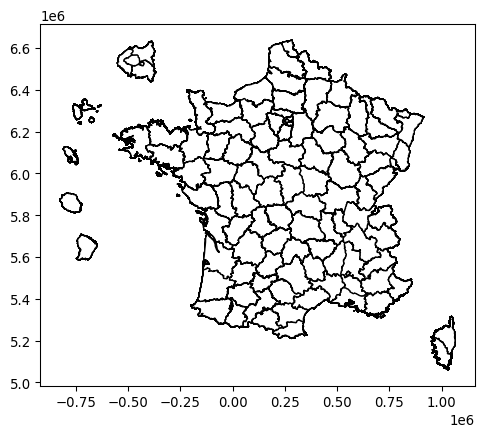

In [14]:
list_sectors = list(datamap['A17'].unique())
ax = datamap.plot(zorder=1, color='white', edgecolor='black')

## Map

/home/coder/local/bin/conda/envs/basesspcloud/lib/python3.10/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(

<AxesSubplot:>

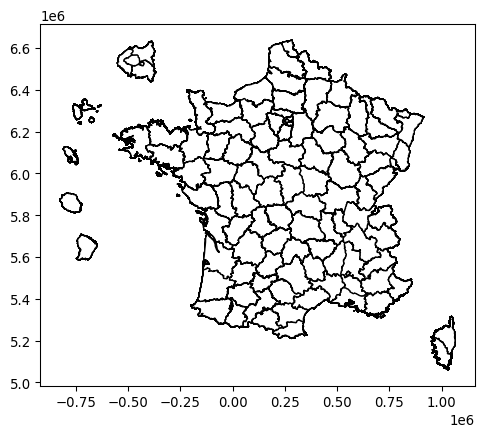

In [15]:
import numpy as np
datamap_points = datamap.copy()
datamap_points['geometry'] = datamap["center"]

#fig, ax = plt.subplots(figsize=(16,16))
#datamap.plot(ax=ax, color="lightgray", edgecolor="grey")
datamap_points['ms'] = np.sqrt(datamap_points['OBS_VALUE'])/5

ax = datamap.plot(zorder=1, color='white', edgecolor='black')
datamap_points.loc[
  datamap_points['A17'] == "OZ"
  ].plot(
    markersize='ms', column = 'OBS_VALUE', cmap = "magma", zorder = 2, ax = ax)